In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import collections
import sqlite3
from pathlib import Path



In [2]:
application = pd.read_csv('application_data.csv')

previous = pd.read_csv('previous_application.csv')


In [3]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
application.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

print(application['NAME_CONTRACT_TYPE'].value_counts())


Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


In [7]:
application.describe

<bound method NDFrame.describe of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      

In [8]:
previous.info

<bound method DataFrame.info of          SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1            

In [9]:
previous['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [10]:
previous['SK_ID_PREV'].duplicated().value_counts()

False    1670214
Name: SK_ID_PREV, dtype: int64

In [11]:
previous['SK_ID_CURR'].duplicated().value_counts()

True     1331357
False     338857
Name: SK_ID_CURR, dtype: int64

In [12]:
application['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [13]:
previous['NAME_CONTRACT_TYPE'].unique()

array(['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA'],
      dtype=object)

In [14]:
previous['WEEKDAY_APPR_PROCESS_START'].unique()

array(['SATURDAY', 'THURSDAY', 'TUESDAY', 'MONDAY', 'FRIDAY', 'SUNDAY',
       'WEDNESDAY'], dtype=object)

In [15]:
previous['PRODUCT_COMBINATION'].unique()


array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest', nan], dtype=object)

In [16]:
previous['PRODUCT_COMBINATION'].isna().value_counts()

False    1669868
True         346
Name: PRODUCT_COMBINATION, dtype: int64

In [17]:
previous.groupby(by='WEEKDAY_APPR_PROCESS_START')['NAME_CONTRACT_STATUS'].describe()

,count,unique,top,freq
WEEKDAY_APPR_PROCESS_START,,,,
FRIDAY,252048,4,Approved,153116
MONDAY,253557,4,Approved,149589
SATURDAY,240631,4,Approved,162993
SUNDAY,164751,4,Approved,118319
THURSDAY,249099,4,Approved,149384
TUESDAY,255118,4,Approved,151273
WEDNESDAY,255010,4,Approved,152107


<AxesSubplot:>

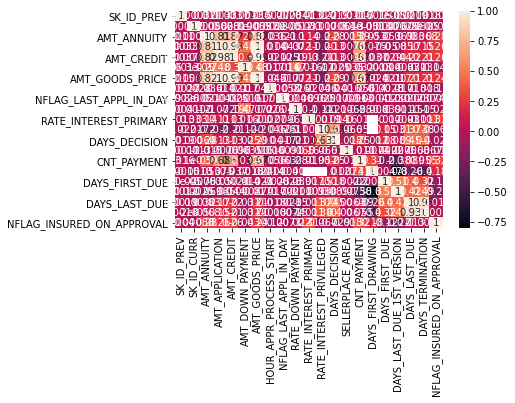

In [18]:
sns.heatmap(previous.corr(), annot = True)

In [19]:
# n1 = application['SK_ID_CURR'].isin(previous['SK_ID_CURR'])
# application['Older'] = np.select([n1],[previous['SK_ID_PREV'].count()],default='New')
# application.head(25)

#application['Older'] = np.where(application['SK_ID_CURR'].isin(previous['SK_ID_CURR']),'Old','New')
#application.head(25)

application['Older'] = application['SK_ID_CURR'].isin(previous['SK_ID_CURR'])
application.head(25)



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Older
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,True
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,True
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,True
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,True
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,True
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,True
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,True
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,True
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,True


In [20]:
previous.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [21]:
previous.select_dtypes('int64')

,SK_ID_PREV,SK_ID_CURR,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
0,2030495,271877,15,1,-73,35
1,2802425,108129,11,1,-164,-1
2,2523466,122040,11,1,-301,-1
3,2819243,176158,7,1,-512,-1
4,1784265,202054,9,1,-781,-1
...,...,...,...,...,...,...
1670209,2300464,352015,12,1,-544,43
1670210,2357031,334635,15,1,-1694,43
1670211,2659632,249544,12,1,-1488,1370
1670212,2785582,400317,9,1,-1185,-1


In [22]:
previous.select_dtypes('float64')

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1730.430,17145.0,17145.0,0.0,17145.0,0.000000,0.182832,0.867336,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,25188.615,607500.0,679671.0,NaN,607500.0,NaN,NaN,NaN,36.0,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,15060.735,112500.0,136444.5,NaN,112500.0,NaN,NaN,NaN,12.0,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,47041.335,450000.0,470790.0,NaN,450000.0,NaN,NaN,NaN,12.0,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,31924.395,337500.0,404055.0,NaN,337500.0,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,14704.290,267295.5,311400.0,0.0,267295.5,0.000000,NaN,NaN,30.0,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,6622.020,87750.0,64291.5,29250.0,87750.0,0.340554,NaN,NaN,12.0,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,11520.855,105237.0,102523.5,10525.5,105237.0,0.101401,NaN,NaN,10.0,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,18821.520,180000.0,191880.0,NaN,180000.0,NaN,NaN,NaN,12.0,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [23]:
float_cols = previous.select_dtypes('float64').columns
float_cols = [col for col in float_cols if 'NFLAG_INSURED_ON_APPROVAL' not in col]
float_cols


['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [24]:
previous[['SK_ID_CURR']+list(float_cols)].head()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,271877,1730.430,17145.0,17145.0,0.0,17145.0,0.0,0.182832,0.867336,12.0,365243.0,-42.0,300.0,-42.0,-37.0
1,108129,25188.615,607500.0,679671.0,NaN,607500.0,NaN,NaN,NaN,36.0,365243.0,-134.0,916.0,365243.0,365243.0
2,122040,15060.735,112500.0,136444.5,NaN,112500.0,NaN,NaN,NaN,12.0,365243.0,-271.0,59.0,365243.0,365243.0
3,176158,47041.335,450000.0,470790.0,NaN,450000.0,NaN,NaN,NaN,12.0,365243.0,-482.0,-152.0,-182.0,-177.0
4,202054,31924.395,337500.0,404055.0,NaN,337500.0,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN


In [25]:
previous.select_dtypes('object')

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest
1,Cash loans,THURSDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low
2,Cash loans,TUESDAY,Y,XNA,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high
3,Cash loans,MONDAY,Y,XNA,Approved,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
4,Cash loans,THURSDAY,Y,Repairs,Refused,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,Consumer loans,WEDNESDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,Furniture,low_normal,POS industry with interest
1670210,Consumer loans,TUESDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,Furniture,middle,POS industry with interest
1670211,Consumer loans,MONDAY,Y,XAP,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,low_normal,POS household with interest
1670212,Cash loans,WEDNESDAY,Y,XNA,Approved,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),XNA,low_normal,Cash X-Sell: low


In [29]:
prev_dummies = pd.get_dummies(previous)

In [30]:
prev_dummies.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,15,1,0.0,...,0,0,0,0,0,0,1,0,0,0
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,11,1,NaN,...,1,0,0,0,0,0,0,0,0,0
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,11,1,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,7,1,NaN,...,0,1,0,0,0,0,0,0,0,0
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,9,1,NaN,...,0,0,0,0,0,0,0,0,0,0


In [31]:
agg_functions = ['sum', 'min', 'max', 'mean', 'count']
agg_functions

['sum', 'min', 'max', 'mean', 'count']

In [32]:
agg_Dict = {}

[agg_Dict.update({col : agg_functions}) for col in float_cols]

agg_Dict

{'AMT_ANNUITY': ['sum', 'min', 'max', 'mean', 'count'],
 'AMT_APPLICATION': ['sum', 'min', 'max', 'mean', 'count'],
 'AMT_CREDIT': ['sum', 'min', 'max', 'mean', 'count'],
 'AMT_DOWN_PAYMENT': ['sum', 'min', 'max', 'mean', 'count'],
 'AMT_GOODS_PRICE': ['sum', 'min', 'max', 'mean', 'count'],
 'RATE_DOWN_PAYMENT': ['sum', 'min', 'max', 'mean', 'count'],
 'RATE_INTEREST_PRIMARY': ['sum', 'min', 'max', 'mean', 'count'],
 'RATE_INTEREST_PRIVILEGED': ['sum', 'min', 'max', 'mean', 'count'],
 'CNT_PAYMENT': ['sum', 'min', 'max', 'mean', 'count'],
 'DAYS_FIRST_DRAWING': ['sum', 'min', 'max', 'mean', 'count'],
 'DAYS_FIRST_DUE': ['sum', 'min', 'max', 'mean', 'count'],
 'DAYS_LAST_DUE_1ST_VERSION': ['sum', 'min', 'max', 'mean', 'count'],
 'DAYS_LAST_DUE': ['sum', 'min', 'max', 'mean', 'count'],
 'DAYS_TERMINATION': ['sum', 'min', 'max', 'mean', 'count']}

In [35]:
agg_data= previous[['SK_ID_CURR'] + list(float_cols)].groupby('SK_ID_CURR').agg(agg_Dict)
agg_data.head()

AMT_ANNUITY                                       AMT_APPLICATION  \
                   sum       min        max       mean count             sum   
SK_ID_CURR                                                                     
100001        3951.000  3951.000   3951.000   3951.000     1         24835.5   
100002        9251.775  9251.775   9251.775   9251.775     1        179055.0   
100003      169661.970  6737.310  98356.995  56553.990     3       1306309.5   
100004        5357.250  5357.250   5357.250   5357.250     1         24282.0   
100005        4813.200  4813.200   4813.200   4813.200     1         44617.5   

                                                 ... DAYS_LAST_DUE          \
                 min       max       mean count  ...           sum     min   
SK_ID_CURR                                       ...                         
100001       24835.5   24835.5   24835.50     1  ...       -1619.0 -1619.0   
100002      179055.0  179055.0  179055.00     1  ...         -25.0   -25.0   
100003       68809.5  900000.0  435436.50     3  ...       -3163.0 -1980.0   
100004       24282.0   24282.0   24282.00     1  ...        -724.0  -724.0   
100005           0.0   44617.5   22308.75     2  ...        -466.0  -466.0   

                                      DAYS_TERMINATION                  \
               max         mean count              sum     min     max   
SK_ID_CURR                                                               
100001     -1619.0 -1619.000000     1          -1612.0 -1612.0 -1612.0   
100002       -25.0   -25.000000     1            -17.0   -17.0   -17.0   
100003      -536.0 -1054.333333     3          -3142.0 -1976.0  -527.0   
100004      -724.0  -724.000000     1           -714.0  -714.0  -714.0   
100005      -466.0  -466.000000     1           -460.0  -460.0  -460.0   

                               
                   mean count  
SK_ID_CURR                     
100001     -1612.000000     1  
100002       -17.000000     1  
100003     -1047.333333     3  
100004      -714.000000     1  
100005      -460.000000     1  

[5 rows x 70 columns]

In [36]:
agg_data.columns = ['_'.join(col) for col in agg_data.columns]
agg_data.head()

,AMT_ANNUITY_sum,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean,AMT_ANNUITY_count,AMT_APPLICATION_sum,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean,AMT_APPLICATION_count,...,DAYS_LAST_DUE_sum,DAYS_LAST_DUE_min,DAYS_LAST_DUE_max,DAYS_LAST_DUE_mean,DAYS_LAST_DUE_count,DAYS_TERMINATION_sum,DAYS_TERMINATION_min,DAYS_TERMINATION_max,DAYS_TERMINATION_mean,DAYS_TERMINATION_count
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3951.000,3951.000,3951.000,3951.000,1,24835.5,24835.5,24835.5,24835.50,1,...,-1619.0,-1619.0,-1619.0,-1619.000000,1,-1612.0,-1612.0,-1612.0,-1612.000000,1
100002,9251.775,9251.775,9251.775,9251.775,1,179055.0,179055.0,179055.0,179055.00,1,...,-25.0,-25.0,-25.0,-25.000000,1,-17.0,-17.0,-17.0,-17.000000,1
100003,169661.970,6737.310,98356.995,56553.990,3,1306309.5,68809.5,900000.0,435436.50,3,...,-3163.0,-1980.0,-536.0,-1054.333333,3,-3142.0,-1976.0,-527.0,-1047.333333,3
100004,5357.250,5357.250,5357.250,5357.250,1,24282.0,24282.0,24282.0,24282.00,1,...,-724.0,-724.0,-724.0,-724.000000,1,-714.0,-714.0,-714.0,-714.000000,1
100005,4813.200,4813.200,4813.200,4813.200,1,44617.5,0.0,44617.5,22308.75,2,...,-466.0,-466.0,-466.0,-466.000000,1,-460.0,-460.0,-460.0,-460.000000,1


In [22]:
conn = sqlite3.connect("Credit_Applications.db")

# application.to_sql("application", conn)
# previous.to_sql("previous", conn)


In [23]:
query = """ Select a.*, p.SK_ID_PREV, p.NAME_CONTRACT_TYPE, p.AMT_APPLICATION,p.WEEKDAY_APPR_PROCESS_START, p.NAME_CONTRACT_STATUS
            From application as a Left Join previous as p 
            On a.SK_ID_CURR = p.SK_ID_CURR"""

df = pd.read_sql(query, conn)
df.head(10)

,index,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Older,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START,NAME_CONTRACT_STATUS
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,0.0,0.0,0.0,1.0,1,1038818.0,Consumer loans,179055.0,SATURDAY,Approved
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0.0,0.0,0.0,0.0,1,1810518.0,Cash loans,900000.0,FRIDAY,Approved
2,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0.0,0.0,0.0,0.0,1,2396755.0,Consumer loans,68809.5,SATURDAY,Approved
3,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0.0,0.0,0.0,0.0,1,2636178.0,Consumer loans,337500.0,SUNDAY,Approved
4,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0.0,0.0,0.0,0.0,1,1564014.0,Consumer loans,24282.0,FRIDAY,Approved
5,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,NaN,NaN,NaN,NaN,1,1020698.0,Cash loans,454500.0,SATURDAY,Approved
6,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,NaN,NaN,NaN,NaN,1,1243599.0,Cash loans,0.0,THURSDAY,Canceled
7,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,NaN,NaN,NaN,NaN,1,1489396.0,Revolving loans,270000.0,THURSDAY,Approved
8,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,NaN,NaN,NaN,NaN,1,1697039.0,Cash loans,688500.0,THURSDAY,Refused
9,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,NaN,NaN,NaN,NaN,1,2078043.0,Cash loans,675000.0,THURSDAY,Approved


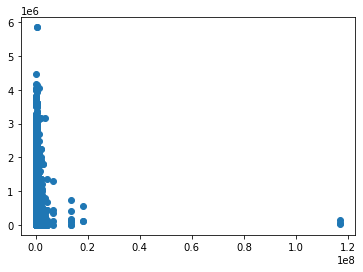

In [24]:
plt.scatter(df['AMT_INCOME_TOTAL'],df['AMT_APPLICATION'])
plt.show()